In [39]:
import numpy as np
import matplotlib.pyplot as plt

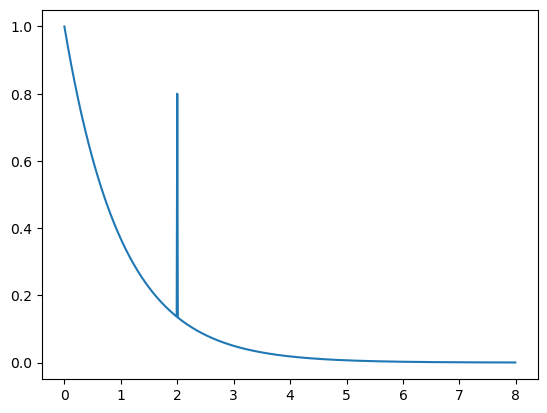

In [40]:
Fs = 100
t = np.arange(0,8, 1/Fs)
x1 = np.exp(-t)
x1[np.uint(2/0.01)]=0.8
plt.plot(t,x1)
plt.show()

In [41]:
def EspectroMagnitudFourier(t, x):
    N = len(t)
    Fs = 1/np.mean(np.diff(t))
    x_fft = np.fft.fftshift(np.fft.fft(x))
    f = np.fft.fftshift(np.fft.fftfreq(N, 1/Fs))
    plt.plot(f, np.abs(x_fft))


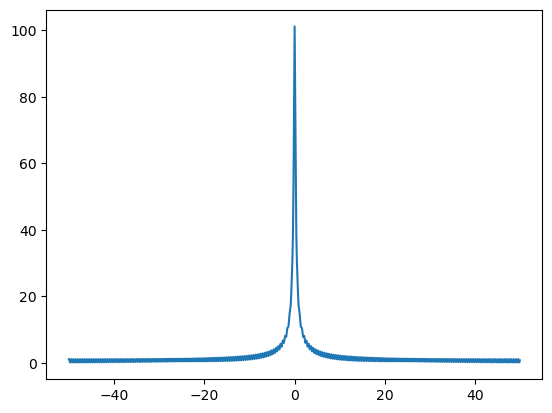

In [42]:
EspectroMagnitudFourier(t,x1)

In [43]:
from scipy.signal import chirp

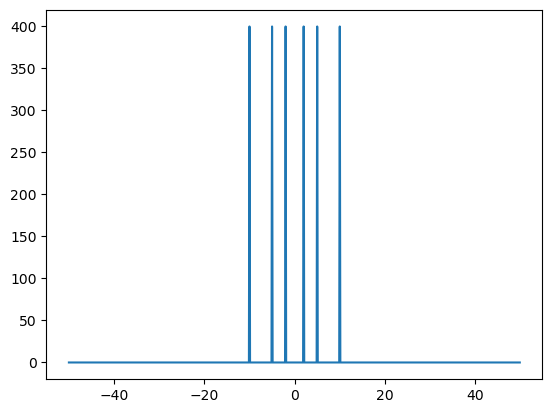

In [44]:
x2 = np.sin(2*np.pi*2*t)+np.sin(2*np.pi*5*t)+np.sin(2*np.pi*10*t)
EspectroMagnitudFourier(t,x2)

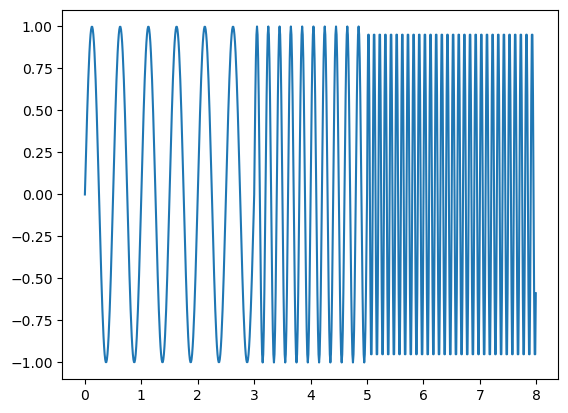

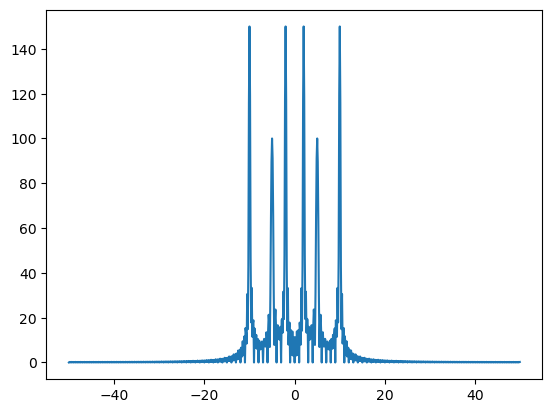

In [45]:
x3 = np.zeros(t.shape)
t1 = np.uint(3/0.01)
t2 = np.uint(5/0.01)
x3[0:t1] = np.sin(2*np.pi*2*t[0:t1])

x3[t1:t2] = np.sin(2*np.pi*5*t[t1:t2])
x3[t2:] = np.sin(2*np.pi*10*t[t2:])
plt.plot(t,x3)
plt.show()



EspectroMagnitudFourier(t,x3)

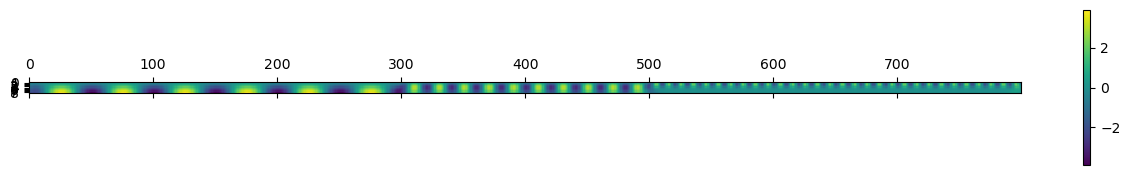

In [46]:
import pywt
import scaleogram as scg

anchos = np.uint(np.arange(1,np.log2(x3.shape[0])))

coef, freqs = pywt.cwt(x3,anchos,"gaus1") 
plt.matshow(coef)
plt.colorbar()
plt.show()

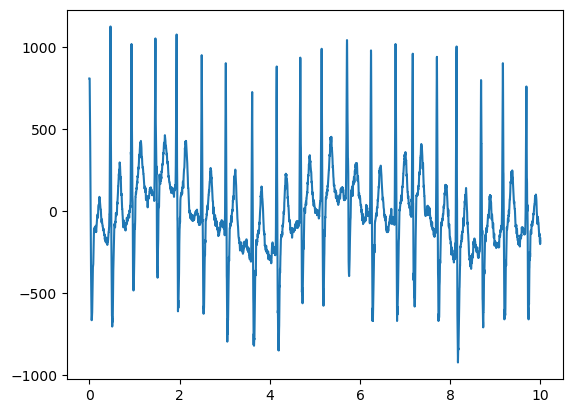

In [47]:
ecg001 = np.genfromtxt("lecture.csv")
t = np.linspace(0,10, 5000)
plt.plot(t,ecg001)

In [48]:
import scipy.signal as sig
t_decimate=sig.decimate(t, 2)

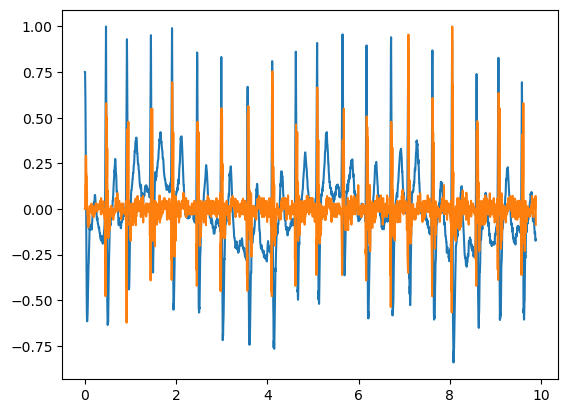

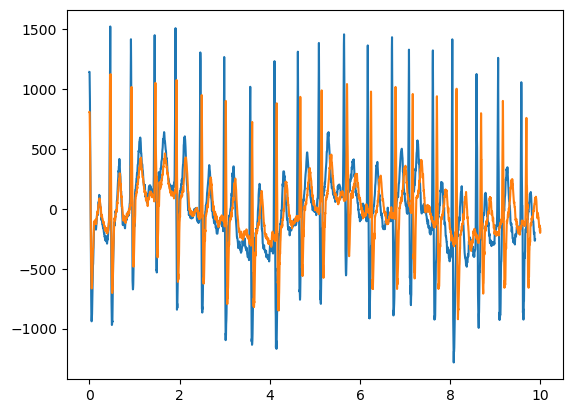

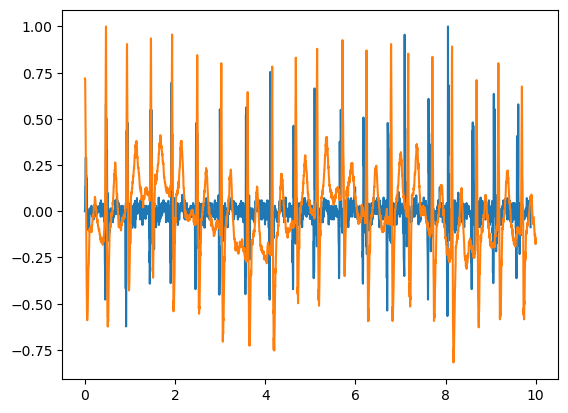

In [49]:
coef_lvl1 = pywt.dwt(ecg001, wavelet="db1")
plt.plot(t_decimate, coef_lvl1[0]/np.max(coef_lvl1[0]))
plt.plot(t_decimate, coef_lvl1[1]/np.max(coef_lvl1[1]))
plt.show()

plt.plot(t_decimate, coef_lvl1[0])
plt.plot(t, ecg001)
plt.show()

plt.plot(t_decimate, coef_lvl1[1]/np.max(coef_lvl1[1]))
plt.plot(t,ecg001/np.max(ecg001))

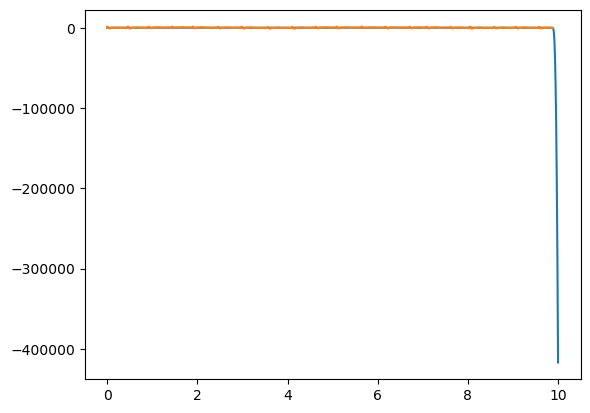

In [50]:
from scipy import interpolate

cA1_int = interpolate.splrep(t_decimate, coef_lvl1[1])
cA1_int_t = interpolate.splev(t, cA1_int)

plt.plot(t, cA1_int_t)
plt.plot(t_decimate, coef_lvl1[0])

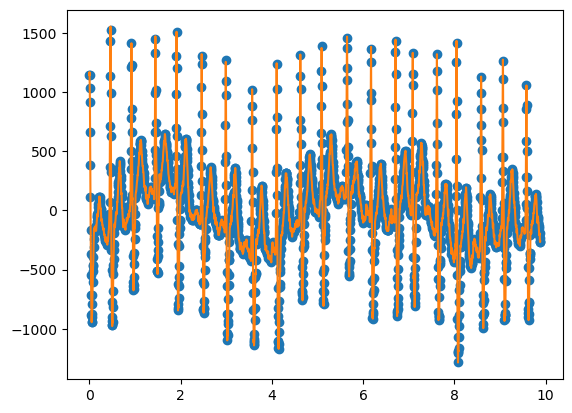

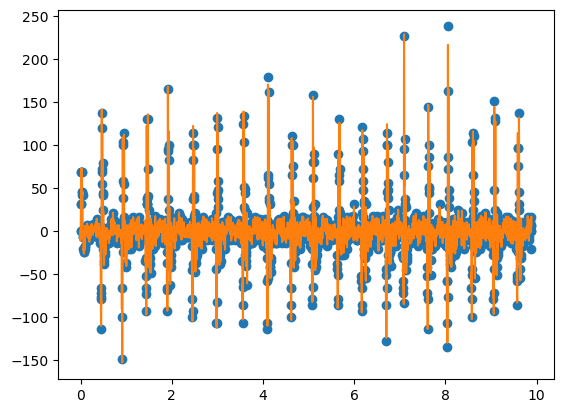

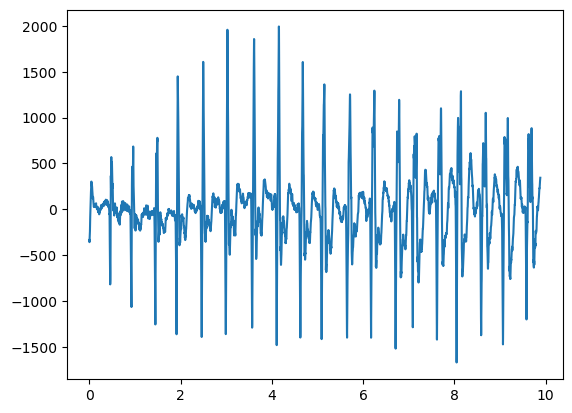

In [51]:
cub_spline_int = interpolate.CubicSpline(t_decimate, coef_lvl1[0])
cA1_int = cub_spline_int(t)[t<=t_decimate[-1]]
plt.plot(t_decimate, coef_lvl1[0], 'o')
plt.plot(t[t<=t_decimate[-1]], cA1_int)
plt.show()

cub_spline_int = interpolate.CubicSpline(t_decimate, coef_lvl1[1])
cD1_int = cub_spline_int(t)[t<=t_decimate[-1]]
plt.plot(t_decimate, coef_lvl1[1], 'o')
plt.plot(t[t<=t_decimate[-1]], cD1_int)
plt.show()

plt.plot(t[t<=t_decimate[-1]],ecg001[t<=t_decimate[-1]]-cA1_int)

In [52]:
import cv2

original = cv2.imread("./images/female-chest-x-ray.jpg", cv2.IMREAD_GRAYSCALE)

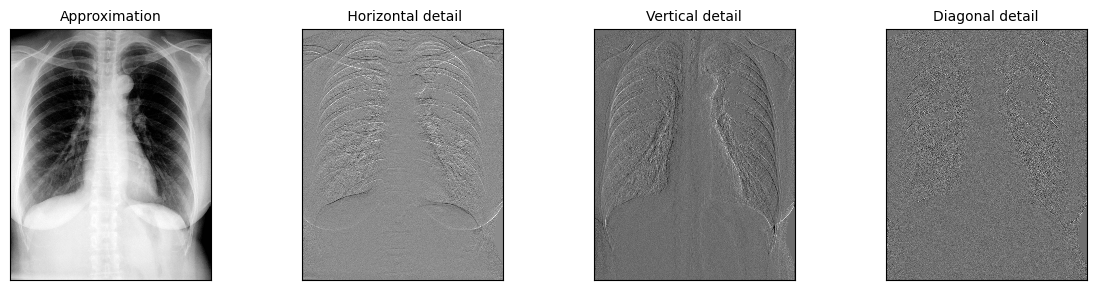

In [53]:
import matplotlib.pyplot as plt
import numpy as np

import pywt
import pywt.data

# Load image
#original = pywt.data.camera()

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

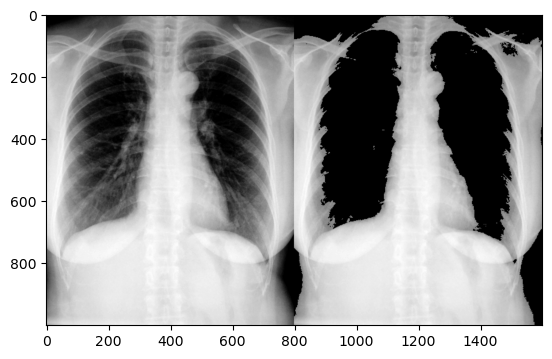

In [54]:
th1 = 0.5*np.max([LL,HL,LH,HH])
LL[LL<th1]=0
HL[HL<th1]=0
LH[LH<th1]=0
HH[HH<th1]=0
coeffs2_denoise = (LL, (LH, HL, HH))
imagen_recons=pywt.idwt2(coeffs2_denoise, wavelet="bior1.3")
plt.imshow(np.hstack((original, imagen_recons)), cmap="gray")

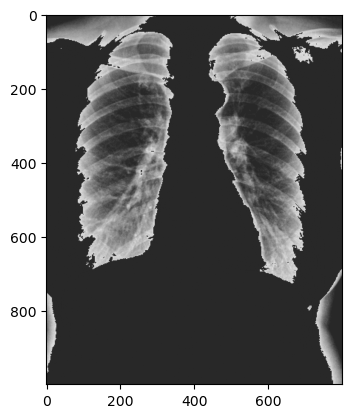

In [55]:
plt.imshow(original-imagen_recons, cmap="gray")